In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE 

In [37]:
#Loading the data
telecom = pd.read_csv('telecom_churn_data.csv')

In [38]:
#Checkings few rows
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [39]:
# to get all the fields
telecom.info(verbose=1)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [40]:
#Checking if mobile number a duplicate
sum(telecom.duplicated(subset = 'mobile_number')) == 0

True

In [41]:
#Finding the percentage of missing values with column name
na_columns = telecom.isnull().sum()/len(telecom)*100
na_columns = na_columns[na_columns>0]
na_columns.sort_values(inplace=True, ascending=False)
na_columns

count_rech_3g_6             74.846748
fb_user_6                   74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
night_pck_user_6            74.846748
                              ...    
last_date_of_month_8         1.100011
loc_ic_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_og_t2o_mou               1.018010
last_date_of_month_7         0.601006
Length: 166, dtype: float64

In [42]:
#Describing the columns with mean, min and max
telecom.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


In [43]:
#Selecting the  columns which has 70% missing value
drop_columns = na_columns[(na_columns > 70) == True].index
drop_columns

Index(['count_rech_3g_6', 'fb_user_6', 'date_of_last_rech_data_6',
       'count_rech_2g_6', 'night_pck_user_6', 'av_rech_amt_data_6',
       'total_rech_data_6', 'arpu_2g_6', 'max_rech_data_6', 'arpu_3g_6',
       'arpu_3g_7', 'count_rech_3g_7', 'count_rech_2g_7', 'av_rech_amt_data_7',
       'max_rech_data_7', 'arpu_2g_7', 'night_pck_user_7',
       'date_of_last_rech_data_7', 'fb_user_7', 'total_rech_data_7',
       'total_rech_data_9', 'count_rech_2g_9', 'max_rech_data_9',
       'date_of_last_rech_data_9', 'fb_user_9', 'count_rech_3g_9',
       'night_pck_user_9', 'av_rech_amt_data_9', 'arpu_2g_9', 'arpu_3g_9',
       'count_rech_2g_8', 'arpu_2g_8', 'fb_user_8', 'count_rech_3g_8',
       'night_pck_user_8', 'date_of_last_rech_data_8', 'total_rech_data_8',
       'arpu_3g_8', 'max_rech_data_8', 'av_rech_amt_data_8'],
      dtype='object')

In [44]:
#Dropping the columns with 70% missing values
telecom = telecom.drop(drop_columns, axis = 1) 
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=186)

In [45]:
#Removing all the columns with date, as it is not have any significance
columnswith_date = telecom[[c for c in telecom if c.startswith('date') | c.startswith('last_date')]].columns
columnswith_date
telecom = telecom.drop(columnswith_date, axis = 1) 

In [46]:
#Making all the columns numeric, which is needed for Standardization
num_cols = [column for column in telecom.columns if column not in ['mobile_number','circle_id']]
telecom[num_cols] = telecom[num_cols].apply(pd.to_numeric)

In [47]:
# calculate average recharge done by customer in June and July
telecom['av_amt_data_6_7'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_6)/2

# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_filtered = telecom.loc[telecom.av_amt_data_6_7 >= telecom.av_amt_data_6_7.quantile(0.7), :]
telecom_filtered = telecom_filtered.reset_index(drop=True)
telecom_filtered.shape

(30066, 179)

In [48]:
#Fill na with 0
telecom_filtered =telecom_filtered.fillna(0)

In [49]:
#Adding the incoming and outgoing calls
telecom_filtered['total_calls_mou_9'] = telecom_filtered.total_ic_mou_9 + telecom_filtered.total_og_mou_9

In [50]:
#Adding the 2g and 3g data usage
telecom_filtered['total_internet_mb_9'] =  telecom_filtered.vol_2g_mb_9 + telecom_filtered.vol_3g_mb_9
telecom_filtered

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_amt_data_6_7,total_calls_mou_9,total_internet_mb_9
0,7001051193,109,0.0,0.0,0.0,429.023,190.704,255.114,114.751,71.03,...,0,0,1673,0.00,0.00,0.00,0.0,499.0,2638.40,0.00
1,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0,0,802,57.74,19.38,18.74,0.0,1580.0,0.00,0.00
2,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,315,21.03,910.65,122.16,0.0,437.0,177.09,0.00
3,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,0,2607,0.00,0.00,0.00,0.0,507.0,1077.95,0.00
4,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,0,511,0.00,2.45,21.89,0.0,570.0,590.30,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30061,7001881483,109,0.0,0.0,0.0,581.397,43.663,262.890,824.724,273.88,...,0,0,1689,0.00,0.00,0.00,0.0,636.0,1057.27,428.72
30062,7001729035,109,0.0,0.0,0.0,644.973,455.228,564.334,267.451,806.73,...,0,0,2696,497.45,598.67,604.08,0.0,567.0,1642.35,950.62
30063,7002111859,109,0.0,0.0,0.0,312.558,512.932,402.080,533.502,199.89,...,0,0,328,104.73,0.00,0.00,0.0,380.0,448.00,393.39
30064,7000498689,109,0.0,0.0,0.0,322.991,303.386,606.817,731.010,0.00,...,0,0,478,1445.74,1151.03,1173.18,0.0,381.0,2.21,4262.81


In [51]:
#tagging the customers for churn
telecom_filtered['churn'] = telecom_filtered.apply(lambda event: 1 if (event.total_calls_mou_9 == 0 and event.total_internet_mb_9 == 0) else 0, axis=1)

In [52]:
telecom_filtered.churn = telecom_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(telecom_filtered.churn.value_counts()*100/telecom_filtered.shape[0])

Churn Ratio:
0    89.253642
1    10.746358
Name: churn, dtype: float64


In [53]:
#selecting all the _9 columns
columnswith_9 = telecom_filtered[[c for c in telecom_filtered if c.endswith('9')]].columns

In [54]:
#Dropping all the _9 columns
telecom_filtered = telecom_filtered.drop(columnswith_9, axis = 1) 
telecom_filtered.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'av_amt_data_6_7', 'churn'],
      dtype='object', length=138)

In [55]:
#Dropping the mobile number and circle id
telecom_filtered =telecom_filtered.drop(['mobile_number','circle_id'],axis=1)

In [56]:
#Checking the columns
telecom_filtered.info(verbose=1)
telecom_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30066 entries, 0 to 30065
Data columns (total 136 columns):
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8    

In [58]:
#converting churn to numeric
telecom_filtered['churn'] = pd.to_numeric(telecom_filtered['churn'])

In [33]:
#Function to remove outlier
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

In [34]:
#Remove the outliers
telecom_filtered = remove_outlier(telecom_filtered)
telecom_filtered

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_amt_data_6_7,churn


In [59]:
#Splitting to train and test
X = telecom_filtered.drop("churn", axis = 1)
y = telecom_filtered['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [60]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
telecom_pca = pca.fit_transform(X_train)
pca = pca.named_steps['pca']

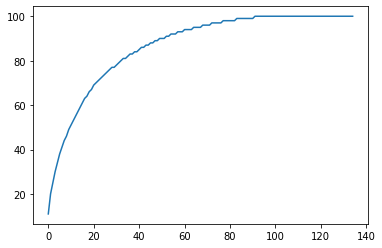

In [61]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100)
plt.plot(cumulative_variance)

In [62]:
#Using logical regression for balanced data
from sklearn.linear_model import LogisticRegression

steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=70)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [63]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)


0.8326047705027083

In [65]:
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)

total=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8239467849223947
Sensitivity :  0.8207042428766953
Specificity :  0.8504577822990844


In [66]:
#Handling imbalance using SMOTe
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [68]:
pca = PCA()

logistic = LogisticRegression()

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pipeline = Pipeline(steps)

# fit model
pipeline.fit(X_train_res, y_train_res)

# check score on train data
pipeline.score(X_train_res, y_train_res)


y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)

total=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)



Accuracy :  0.8289356984478936
Sensitivity :  0.8279208659947742
Specificity :  0.8372329603255341


In [84]:

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# hyperparameter space
param_grid = {'pca__n_components': [60, 70,80],
          'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10]}


# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.0min finished


In [85]:
# print best hyperparameters
print(" AUC: ", best_clf.best_score_)
print(" hyperparameters: ", best_clf.best_params_)

 AUC:  0.9104343311386245
 hyperparameters:  {'logistic__C': 10, 'pca__n_components': 80}


In [ ]:
#LogisticRegression with PCA components 80 is giving good accuracy

In [104]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \n'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_))
             

R^2 Training Score: 0.93 
OOB Score: 0.49 



In [ ]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)


In [123]:
print (perm_imp_rfpimp.head(100).to_string())

                    Importance
Feature                       
total_ic_mou_8        0.514949
roam_og_mou_8         0.209286
total_rech_amt_8      0.164810
last_day_rch_amt_8    0.083045
max_rech_amt_8        0.067067
roam_ic_mou_8         0.060709
spl_og_mou_8          0.046391
total_og_mou_8        0.042411
loc_ic_mou_8          0.042183
onnet_mou_8           0.037913
aon                   0.033773
total_rech_num_8      0.032103
loc_og_t2m_mou_8      0.027767
arpu_8                0.026794
loc_ic_t2m_mou_8      0.025962
arpu_7                0.024200
roam_og_mou_7         0.022497
vol_2g_mb_8           0.021227
roam_ic_mou_7         0.021155
loc_og_mou_8          0.020590
std_og_mou_7          0.019472
total_rech_num_6      0.019045
offnet_mou_8          0.017825
total_rech_num_7      0.017361
loc_ic_t2m_mou_7      0.015495
std_og_t2t_mou_6      0.015092
std_og_mou_6          0.013551
sep_vbc_3g            0.012492
arpu_6                0.012396
vol_3g_mb_8           0.011883
loc_ic_t

In [ ]:
# Total Incoming ,Roaming outgoing, Total Recharge Amoutn,Last day recharge amount,Max Recharge amount  are the important
# features

# Company need to focus on how many incoming user is getting
# Company need to focus on Roaming outgoing 
# Recharge amount on  the last day as well as amount is having impact for churn 



